# 5 Modeling<a id='5_Modeling'></a>
Justin Jimenez 1/20/2022

The objective of this notebook was to develop various models and evaluate the best model for the application.

# 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Importing](#5.2_Importing)
  * [5.3 Dummy Classifier](#5.3_Dummy_Classifier)
  * [5.4 Logistic Regression](#5.4_Logistic_Regression)
  * [5.5 Decision Tree](#5.5_Decision_Tree)
      * [5.5.1 Gini Tree](#5.5.1_Gini_Tree)
      * [5.5.2 Entropy Tree](#5.5.2_Entropy_Tree)
  * [5.6 Random Forest](#5.6_Random_Forest)
  * [5.7 Gradient Boost](#5.7_Gradient_Boost)
  * [5.8 Model Comparison](#5.8_Model_Comparison)
      * [5.8.1 Dummy Classifier](#5.8.1_Dummy_Classifier)
      * [5.8.2 Logistic Regression](#5.8.2_Logistic_Regression)
      * [5.8.3 Gini Decision_Tree](#5.8.3_Gini_Decision_Tree)
      * [5.8.4 Entropy_Decision_Tree](#5.8.4_Entropy_Decision_Tree)
      * [5.8.5 Random Forest](#5.8.5_Random_Forest)
      * [5.8.6 Gradient Boosting Classifier](#5.8.6_Gradient_Boosting_Classifier)
  * [5.9 Model Selection](#5.9_Model_Selection)
  * [5.10 Data Quantity Assessment](#5.10_Data_Quantity_Assessment)
  * [5.11 Retrain and Visualize](#5.11_Retrain)
  * [5.12 Export](#5.12_Export)
  
      
# 5.2 Importing<a id='5.2_Importing'></a>

In [70]:
import pandas as pd
import numpy as np
import bamboolib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import sklearn.tree
import graphviz
from sklearn import __version__ as sklearn_version
import datetime
# from library.sb_utils import save_file

In [71]:
X_final = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\X_final.csv')

In [72]:
X_train = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\X_train.csv')

In [73]:
X_test = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\X_test.csv')

In [74]:
y_final = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\y_final.csv')

In [75]:
y_train = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\y_train.csv')

In [76]:
y_test = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\y_test.csv')

# 5.3 Dummy Classifier<a id='5.3_Dummy_Classifier'></a>
[Table of Contents](#5.1_Contents)

First I created a dummy classifier to use as a baseline comparison for the advanced models. On an imbalanced dataset, using a dummy classifier with the 'most frequent' strategy would provide misleading accuracy and poor recall scores. The training set was balanced with SMOTEENN, so the results would not be as poor as that. Nonetheless I opted to use the 'stratified' strategy.

From the sklearn documentation:

“stratified”: the predict_proba method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The predict method returns the class label which got probability one in the one-hot vector of predict_proba. Each sampled row of both methods is therefore independent and identically distributed.

In [77]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [78]:
y_pred = dummy_clf.predict(X_train)

In [79]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39    238799
           1       0.61      0.61      0.61    376815

    accuracy                           0.53    615614
   macro avg       0.50      0.50      0.50    615614
weighted avg       0.53      0.53      0.53    615614



In [80]:
y_pred = dummy_clf.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52    133050
           1       0.20      0.61      0.31     34135

    accuracy                           0.43    167185
   macro avg       0.50      0.50      0.41    167185
weighted avg       0.67      0.43      0.48    167185



# 5.4 Logistic Regression<a id='5.4_Logistic_Regression'></a>
[Table of Contents](#5.1_Contents)

In [82]:
class_weight = []
for i in np.linspace(0.5,5,1000):
    class_weight.append({0: i, 1: 1})

In [83]:
param_grid=dict(C = np.linspace(0.0000000001,10,1000), penalty = ['l2', 'l1', 'elasticnet', 'none'], class_weight = class_weight)
clf = LogisticRegression(random_state = 42)
clf_cv = RandomizedSearchCV(clf, param_grid, scoring='f1', cv=5)
clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': array([1.00000000e-10, 1.00100101e-02, 2.00200201e-02, 3.00300301e-02,
       4.00400401e-02, 5.00500501e-02, 6.00600602e-02, 7.00700702e-02,
       8.00800802e-02, 9.00900902e-02, 1.00100100e-01, 1.10110110e-01,
       1.20120120e-01, 1.30130130e-01, 1.40140140e-01, 1.50150150e-01,
       1.601601...
                                                         {0: 0.5810810810810811,
                                                          1: 1},
                                                         {0: 0.5855855855855856,
                                                          1: 1},
                                                         {0: 0.5900900900900901,
                                                          1: 1},
                                                         {0: 0.5945945945945946,
                                                          1: 

In [84]:
clf_cv.best_params_

{'penalty': 'none',
 'class_weight': {0: 0.9864864864864864, 1: 1},
 'C': 8.468468468483783}

In [85]:
y_pred = clf_cv.predict(X_train)

In [86]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83    238799
           1       0.91      0.86      0.88    376815

    accuracy                           0.86    615614
   macro avg       0.85      0.86      0.85    615614
weighted avg       0.86      0.86      0.86    615614



In [87]:
y_pred = clf_cv.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84    133050
           1       0.38      0.43      0.40     34135

    accuracy                           0.74    167185
   macro avg       0.61      0.62      0.62    167185
weighted avg       0.75      0.74      0.75    167185



### Finalized Logistic Regression Model

In [89]:
clf = LogisticRegression(random_state = 42, penalty = 'none', 
                         class_weight = {0: 0.9324324324324325, 1: 1}, C = 4.2842842843414415).fit(X_train, y_train)

In [90]:
y_pred = clf.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83    133050
           1       0.38      0.44      0.41     34135

    accuracy                           0.74    167185
   macro avg       0.61      0.63      0.62    167185
weighted avg       0.75      0.74      0.74    167185



In [92]:
logreg_features = pd.DataFrame()
logreg_features['features'] = X_train.columns
logreg_features['coef'] = clf.coef_[0]
logreg_features = logreg_features.sort_values(by=['coef'], ascending=[False])

# 5.5 Decision Tree<a id='5.5_Decision_Tree'></a>
[Table of Contents](#5.1_Contents)

## 5.5.1 Gini Tree<a id='5.5.1_Gini_Tree'></a>

In [93]:
param_grid = dict(
    class_weight = class_weight,
    max_depth=list(range(2,11)),
    min_samples_leaf=list(range(1,21)),
    min_samples_split=list(range(5,51)),
)
gini_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'gini')
gini_tree_cv = RandomizedSearchCV(gini_tree, param_grid, scoring='f1', cv=5).fit(X_train, y_train)

In [94]:
gini_tree_cv.best_params_

{'min_samples_split': 32,
 'min_samples_leaf': 3,
 'max_depth': 4,
 'class_weight': {0: 0.9684684684684685, 1: 1}}

In [95]:
y_pred = gini_tree_cv.predict(X_train)

In [96]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65    238799
           1       0.77      0.87      0.81    376815

    accuracy                           0.76    615614
   macro avg       0.75      0.73      0.73    615614
weighted avg       0.75      0.76      0.75    615614



In [97]:
y_pred = gini_tree_cv.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.54      0.67    133050
           1       0.28      0.69      0.40     34135

    accuracy                           0.57    167185
   macro avg       0.57      0.61      0.53    167185
weighted avg       0.75      0.57      0.61    167185



### Finalized Gini Decision Tree

In [99]:
gini_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'gini', min_samples_split = 13,
                                                  min_samples_leaf = 15, max_depth = 3, class_weight = {0: 1.5855855855855856, 1: 1}
                                                  ).fit(X_train, y_train)

In [100]:
sorted(list(zip(gini_tree.feature_importances_, X_train.columns)), reverse = True)

[(0.6397306047672607, 'int_rate'),
 (0.24030724544307863, 'last_credit_pull_d'),
 (0.06581756136304372, 'home_ownership_MORTGAGE'),
 (0.054144588426616735, 'loan_amnt'),
 (0.0, 'total_bal_ex_mort'),
 (0.0, 'tot_hi_cred_lim'),
 (0.0, 'tot_bal_tot_hi_cred_lim_ratio'),
 (0.0, 'tot_bal_income_ratio'),
 (0.0, 'tax_liens'),
 (0.0, 'purpose_vacation'),
 (0.0, 'purpose_other'),
 (0.0, 'purpose_moving'),
 (0.0, 'purpose_medical'),
 (0.0, 'purpose_major_purchase'),
 (0.0, 'purpose_house'),
 (0.0, 'purpose_energy'),
 (0.0, 'purpose_credit_card'),
 (0.0, 'purpose_consolidation'),
 (0.0, 'purpose_car'),
 (0.0, 'pub_rec_bankruptcies'),
 (0.0, 'mths_since_recent_inq'),
 (0.0, 'mths_since_last_delinq'),
 (0.0, 'installment'),
 (0.0, 'inq_last_12m'),
 (0.0, 'home_ownership_RENT'),
 (0.0, 'home_ownership_OWN'),
 (0.0, 'home_ownership_NONE'),
 (0.0, 'fico_avg'),
 (0.0, 'emp_length_No Employment'),
 (0.0, 'emp_length_< 1 year'),
 (0.0, 'emp_length_9 years'),
 (0.0, 'emp_length_8 years'),
 (0.0, 'emp_lengt

In [101]:
## Visualize the decision tree
# dot_data = sklearn.tree.export_graphviz(gini_tree, out_file=None, 
#                      feature_names=X_test.columns,  
#                      class_names=str(gini_tree.classes_),  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph

## 5.5.2 Entropy Tree<a id='5.5.2_Entropy_Tree'></a>
[Table of Contents](#5.1_Contents)

In [162]:
param_grid = dict(
    class_weight = class_weight,
    max_depth=list(range(2,11)),
    min_samples_leaf=list(range(1,21)),
    min_samples_split=list(range(5,51)),
)
entropy_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'entropy')
entropy_tree_cv = RandomizedSearchCV(entropy_tree, param_grid, scoring='f1', cv=5).fit(X_train, y_train)

In [163]:
entropy_tree_cv.best_params_

{'min_samples_split': 22,
 'min_samples_leaf': 20,
 'max_depth': 4,
 'class_weight': {0: 0.9684684684684685, 1: 1}}

In [164]:
y_pred = entropy_tree_cv.predict(X_train)

In [165]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62    238799
           1       0.75      0.89      0.81    376815

    accuracy                           0.75    615614
   macro avg       0.75      0.71      0.72    615614
weighted avg       0.75      0.75      0.74    615614



In [166]:
y_pred = entropy_tree_cv.predict(X_test)

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.48      0.62    133050
           1       0.28      0.79      0.41     34135

    accuracy                           0.54    167185
   macro avg       0.59      0.63      0.52    167185
weighted avg       0.77      0.54      0.58    167185



### Finalized Entropy Decision Tree

In [192]:
entropy_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'entropy', min_samples_split = 46,
                                                  min_samples_leaf = 2, max_depth = 3, class_weight = {0: 0.7612612612612613, 1: 1}
                                                  ).fit(X_train, y_train)

In [193]:
sorted(list(zip(entropy_tree.feature_importances_, X_train.columns)), reverse = True)

[(0.6617593608502509, 'int_rate'),
 (0.22521955349859674, 'last_credit_pull_d'),
 (0.06088230360915024, 'home_ownership_MORTGAGE'),
 (0.05213878204200208, 'loan_amnt'),
 (0.0, 'total_bal_ex_mort'),
 (0.0, 'tot_hi_cred_lim'),
 (0.0, 'tot_bal_tot_hi_cred_lim_ratio'),
 (0.0, 'tot_bal_income_ratio'),
 (0.0, 'tax_liens'),
 (0.0, 'purpose_vacation'),
 (0.0, 'purpose_other'),
 (0.0, 'purpose_moving'),
 (0.0, 'purpose_medical'),
 (0.0, 'purpose_major_purchase'),
 (0.0, 'purpose_house'),
 (0.0, 'purpose_energy'),
 (0.0, 'purpose_credit_card'),
 (0.0, 'purpose_consolidation'),
 (0.0, 'purpose_car'),
 (0.0, 'pub_rec_bankruptcies'),
 (0.0, 'mths_since_recent_inq'),
 (0.0, 'mths_since_last_delinq'),
 (0.0, 'installment'),
 (0.0, 'inq_last_12m'),
 (0.0, 'home_ownership_RENT'),
 (0.0, 'home_ownership_OWN'),
 (0.0, 'home_ownership_NONE'),
 (0.0, 'fico_avg'),
 (0.0, 'emp_length_No Employment'),
 (0.0, 'emp_length_< 1 year'),
 (0.0, 'emp_length_9 years'),
 (0.0, 'emp_length_8 years'),
 (0.0, 'emp_length

In [195]:
# # Visualize the decision tree
# dot_data = sklearn.tree.export_graphviz(entropy_tree, out_file=None, 
#                      feature_names=X_test.columns,  
#                      class_names=[str(entropy_tree.classes_[0]), str(entropy_tree.classes_[1])],  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph

# 5.6 Random Forest<a id='5.6_Random_Forest'></a>
[Table of Contents](#5.1_Contents)

In [111]:
param_grid = dict(
    max_depth=list(range(2,4)),
    min_samples_leaf=list(range(1,21)),
    min_samples_split=list(range(5,51)),
    class_weight = class_weight
)
rf = RandomForestClassifier(n_estimators = 50, max_features = 'auto', 
                                random_state = 42, n_jobs = -1)
rf_cv = RandomizedSearchCV(rf, param_grid, scoring='f1', cv=5)
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                                    random_state=42),
                   param_distributions={'class_weight': [{0: 0.5, 1: 1},
                                                         {0: 0.5045045045045045,
                                                          1: 1},
                                                         {0: 0.509009009009009,
                                                          1: 1},
                                                         {0: 0.5135135135135135,
                                                          1: 1},
                                                         {0: 0.5180180180180181,
                                                          1: 1},
                                                         {0: 0.5225225225225225,
                                                          1: 1},
                       

In [112]:
rf_cv.best_params_

{'min_samples_split': 24,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'class_weight': {0: 1.2522522522522523, 1: 1}}

In [113]:
y_pred = rf_cv.predict(X_train)

In [114]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68    238799
           1       0.79      0.87      0.83    376815

    accuracy                           0.78    615614
   macro avg       0.77      0.75      0.75    615614
weighted avg       0.77      0.78      0.77    615614



In [115]:
y_pred = rf_cv.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69    133050
           1       0.30      0.72      0.42     34135

    accuracy                           0.60    167185
   macro avg       0.59      0.64      0.56    167185
weighted avg       0.77      0.60      0.64    167185



### Finalized Random Forest Classifier

In [181]:
rf = RandomForestClassifier(n_estimators=50, max_features='auto', class_weight={0: 1.2522522522522523, 1: 1}, n_jobs = -1, 
                            random_state = 42, min_samples_split = 24, min_samples_leaf = 4, 
                            max_depth = 3).fit(X_train, y_train)

In [182]:
sorted(list(zip(rf.feature_importances_, X_train.columns)), reverse = True)

[(0.2744726762075758, 'int_rate'),
 (0.14358790966112872, 'last_credit_pull_d'),
 (0.10294936203125006, 'home_ownership_MORTGAGE'),
 (0.09424292254249486, 'emp_length_10+ years'),
 (0.07444289772819053, 'loan_amnt'),
 (0.05929329141041225, 'installment'),
 (0.05901856543747831, 'tot_bal_tot_hi_cred_lim_ratio'),
 (0.03883700771243196, 'fico_avg'),
 (0.0352153834164352, 'purpose_credit_card'),
 (0.03226204027165512, 'home_ownership_OWN'),
 (0.012758236881163358, 'emp_length_2 years'),
 (0.01180395027293359, 'annual_inc'),
 (0.010876088746417809, 'tot_hi_cred_lim'),
 (0.00856762719492486, 'purpose_house'),
 (0.00847287763965954, 'purpose_other'),
 (0.00784800329952842, 'home_ownership_RENT'),
 (0.006790020373288101, 'emp_length_3 years'),
 (0.0067079482143713055, 'emp_length_5 years'),
 (0.00646435439543068, 'purpose_consolidation'),
 (0.003514718329637801, 'mths_since_last_delinq'),
 (0.0011518369959882162, 'emp_length_4 years'),
 (0.0003612967325122992, 'emp_length_< 1 year'),
 (0.00029

# 5.7 Gradient Boosting Trees<a id='5.7_Gradient_Boost'></a>
[Table of Contents](#5.1_Contents)

In [121]:
param_grid = dict(
    learning_rate=[0.001, 0.05, 0.1, 0.2, 0.5],
    max_depth=list(range(2,4)),
    min_samples_leaf=list(range(1,21)),
    min_samples_split=list(range(5,51)),
)
gb = GradientBoostingClassifier(n_estimators=50, max_features=2, 
                                random_state = 42)
gb_cv = RandomizedSearchCV(gb, param_grid, scoring='f1', cv=5)
gb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(max_features=2,
                                                        n_estimators=50,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.001, 0.05, 0.1, 0.2,
                                                          0.5],
                                        'max_depth': [2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 1

In [122]:
gb_cv.best_params_

{'min_samples_split': 23,
 'min_samples_leaf': 20,
 'max_depth': 2,
 'learning_rate': 0.1}

In [123]:
y_pred = gb_cv.predict(X_train)

In [124]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68    238799
           1       0.77      0.93      0.84    376815

    accuracy                           0.79    615614
   macro avg       0.81      0.75      0.76    615614
weighted avg       0.80      0.79      0.78    615614



In [125]:
y_pred = gb_cv.predict(X_test)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64    133050
           1       0.28      0.74      0.40     34135

    accuracy                           0.55    167185
   macro avg       0.58      0.62      0.52    167185
weighted avg       0.76      0.55      0.59    167185



### Finalized Gradient Boosting Classifier

In [127]:
gb = GradientBoostingClassifier(n_estimators=50, max_features=2, learning_rate = 0.2,
                                random_state = 42, min_samples_split = 43, min_samples_leaf = 2, max_depth = 2).fit(X_train, y_train)

In [128]:
sorted(list(zip(gb.feature_importances_, X_train.columns)), reverse = True)

[(0.1251562819620649, 'int_rate'),
 (0.11921671524725098, 'last_credit_pull_d'),
 (0.09192311368256305, 'emp_length_10+ years'),
 (0.06813547175074905, 'purpose_credit_card'),
 (0.0600316308026645, 'home_ownership_MORTGAGE'),
 (0.05552225227281386, 'fico_avg'),
 (0.05134535281612374, 'loan_amnt'),
 (0.04558523491736634, 'installment'),
 (0.038232227559465246, 'purpose_house'),
 (0.036109319231432395, 'emp_length_2 years'),
 (0.02647582484102676, 'home_ownership_OWN'),
 (0.02579248850945864, 'purpose_consolidation'),
 (0.024172713951850035, 'emp_length_4 years'),
 (0.024057670619290896, 'tot_hi_cred_lim'),
 (0.02357482253674353, 'emp_length_3 years'),
 (0.022486616023071934, 'purpose_other'),
 (0.02123085470771254, 'emp_length_5 years'),
 (0.018019276505823585, 'annual_inc'),
 (0.017852552245756718, 'emp_length_8 years'),
 (0.016041424444637922, 'pub_rec_bankruptcies'),
 (0.013656286058682628, 'emp_length_6 years'),
 (0.011608648351651336, 'emp_length_< 1 year'),
 (0.01062790270003077, 

# 5.8 Model Comparison<a id='5.8_Model_Comparison'></a>
[Table of Contents](#5.1_Contents)

It is important to note that all of these models were optimized for recall score. For this application, the priority is to identify and not accept applicants that are likely to default - accepting these applicants could increase the financial risk of the company. Therefore the recall score is the most important evaluation metric.

In [129]:
def plot_confusion_matrix(test, pred, title, normalize = False):

    cm = confusion_matrix(test, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
              
    df_cm = pd.DataFrame(cm.round(2))
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='')
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f'{title} Confusion Matrix')

    return None

# 5.8.1 Dummy Classifier<a id='5.8.1_Dummy_Classifier'></a>
[Table of Contents](#5.1_Contents)

The dummy classifier performed surprisingly well, correctly catching 61% of defaulted loans in the test set. However, this classifier performs poorly in f1 score and overall accuracy.

In [130]:
dummy_y_pred = dummy_clf.predict(X_test)

### Testing Classification Report

In [131]:
print(classification_report(y_test, dummy_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52    133050
           1       0.20      0.61      0.31     34135

    accuracy                           0.43    167185
   macro avg       0.50      0.50      0.41    167185
weighted avg       0.67      0.43      0.48    167185



### Testing Confusion Matrix

Normalized confusion matrix


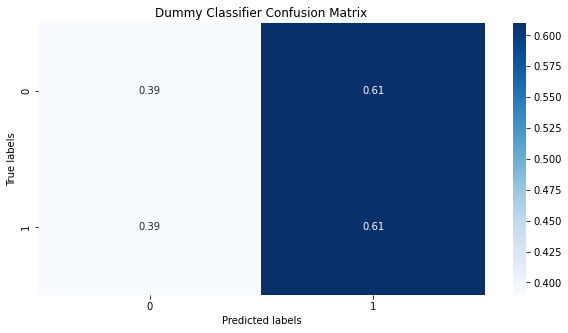

In [132]:
plot_confusion_matrix(y_test, dummy_y_pred, 'Dummy Classifier', normalize = True)

### Testing ROC curve

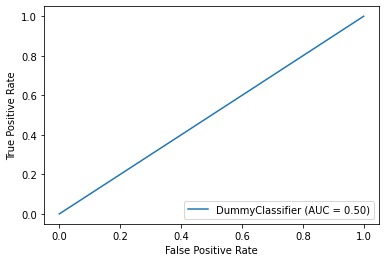

In [133]:
plot_roc_curve(dummy_clf, X_test, y_test)

### Testing Precision - Recall Curve

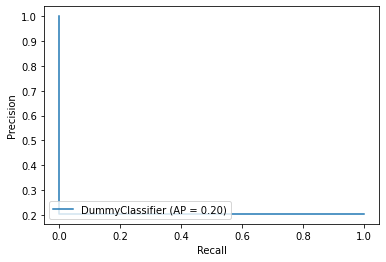

In [134]:
plot_precision_recall_curve(dummy_clf, X_test, y_test)

# 5.8.2 Logistic Regression<a id='5.8.2_Logistic_Regression'></a>
[Table of Contents](#5.1_Contents)

This model is the most interpretable of all of the advanced models and it performs decently well, catching 64% of defaulted loans on the test set. The overall accuracy and f1 score are also significantly better than the dummy classifier.

In [135]:
clf_y_pred = clf.predict(X_test)

### Testing Classification Report

In [136]:
print(classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83    133050
           1       0.38      0.44      0.41     34135

    accuracy                           0.74    167185
   macro avg       0.61      0.63      0.62    167185
weighted avg       0.75      0.74      0.74    167185



### Testing Confusion Matrix

Normalized confusion matrix


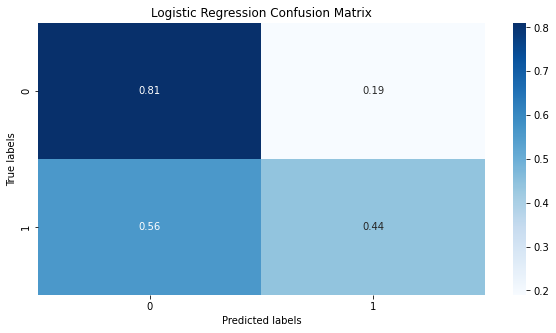

In [137]:
plot_confusion_matrix(y_test, clf_y_pred, 'Logistic Regression', normalize = True)

### Testing ROC curve

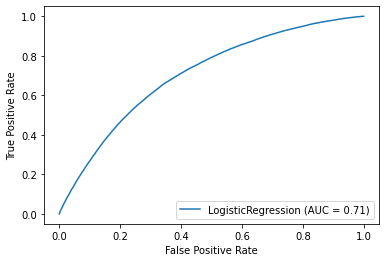

In [138]:
plot_roc_curve(clf, X_test, y_test)

### Testing Precision - Recall Curve

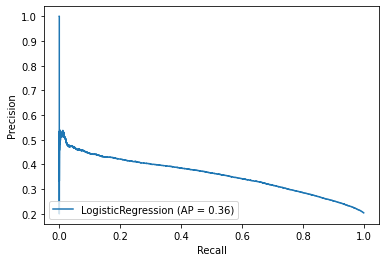

In [139]:
plot_precision_recall_curve(clf, X_test, y_test)

# 5.8.3 Gini Decision Tree<a id='5.8.3_Gini_Decision_Tree'></a>
[Table of Contents](#5.1_Contents)

This model ranks above the dummy classifier and below the logistic regression. At a depth of 10 levels, it is interpretable but more complex than the logistic regression. It identifed 55% of defaulted loans, but also performs well with the non-defaulted class - a trade off.

In [140]:
gini_y_pred = gini_tree.predict(X_test)

### Testing Classification Report

In [141]:
print(classification_report(y_test, gini_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71    133050
           1       0.31      0.71      0.43     34135

    accuracy                           0.62    167185
   macro avg       0.60      0.65      0.57    167185
weighted avg       0.77      0.62      0.65    167185



### Testing Confusion Matrix

Normalized confusion matrix


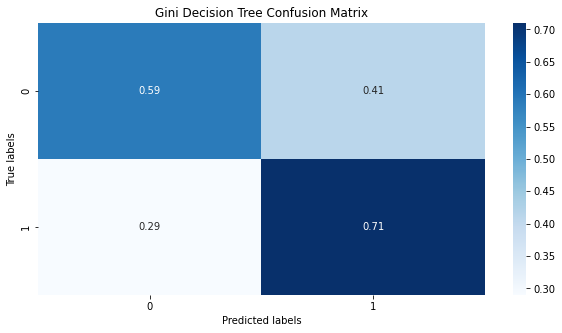

In [142]:
plot_confusion_matrix(y_test, gini_y_pred, 'Gini Decision Tree', normalize = True)

### Testing ROC curve

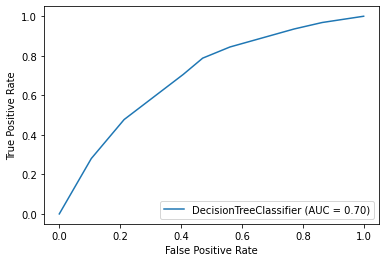

In [143]:
plot_roc_curve(gini_tree, X_test, y_test)

### Testing Precision - Recall Curve

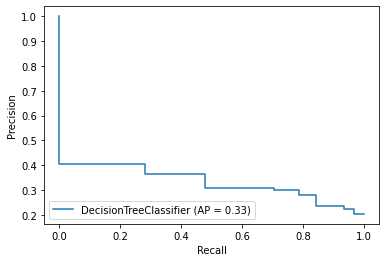

In [144]:
plot_precision_recall_curve(gini_tree, X_test, y_test)

# 5.8.4 Entropy Decision Tree<a id='5.8.4_Entropy_Decision_Tree'></a>
[Table of Contents](#5.1_Contents)

This decision tree was better than the Gini tree, but still more complicated than the logistic regression since this model also has 10 levels. However, it produces the highest recall score, identifying 71% of defaulted loans.

In [196]:
entropy_y_pred = entropy_tree.predict(X_test)

### Testing Classification Report

In [197]:
print(classification_report(y_test, entropy_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.42      0.57    133050
           1       0.27      0.83      0.41     34135

    accuracy                           0.50    167185
   macro avg       0.59      0.62      0.49    167185
weighted avg       0.78      0.50      0.54    167185



### Testing Confusion Matrix

Normalized confusion matrix


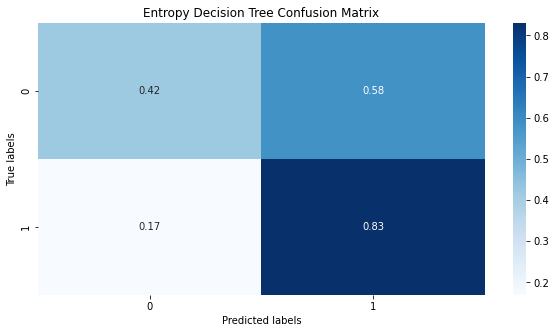

In [198]:
plot_confusion_matrix(y_test, entropy_y_pred, 'Entropy Decision Tree', normalize = True)

### Testing ROC curve

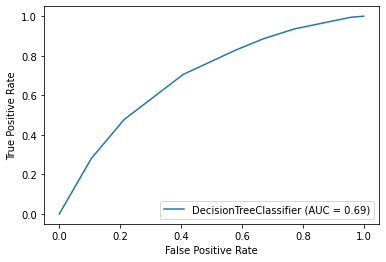

In [199]:
plot_roc_curve(entropy_tree, X_test, y_test)

### Testing Precision - Recall Curve

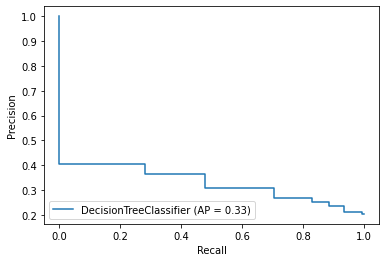

In [200]:
plot_precision_recall_curve(entropy_tree, X_test, y_test)

# 5.8.5 Random Forest<a id='5.8.5_Random_Forest'></a>
[Table of Contents](#5.1_Contents)

This model had similar performance to the gini decision tree, but less interpretability.

In [184]:
rf_y_pred = rf.predict(X_test)

### Testing Classification Report

In [185]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69    133050
           1       0.30      0.72      0.42     34135

    accuracy                           0.60    167185
   macro avg       0.59      0.64      0.56    167185
weighted avg       0.77      0.60      0.64    167185



### Testing Confusion Matrix

Normalized confusion matrix


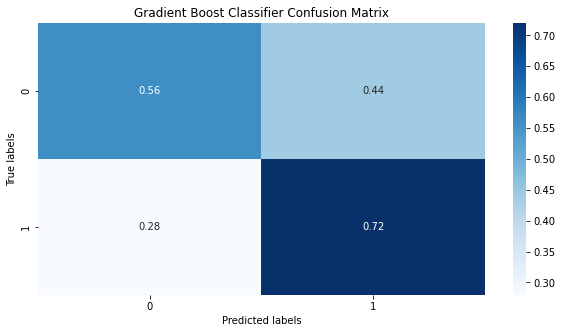

In [186]:
plot_confusion_matrix(y_test, rf_y_pred, 'Gradient Boost Classifier', normalize = True)

### Testing ROC curve

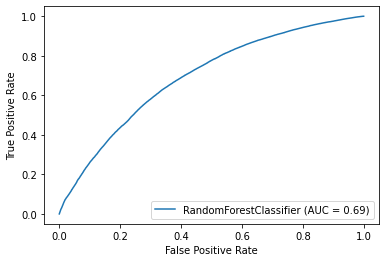

In [187]:
plot_roc_curve(rf, X_test, y_test)

### Testing Precision - Recall Curve

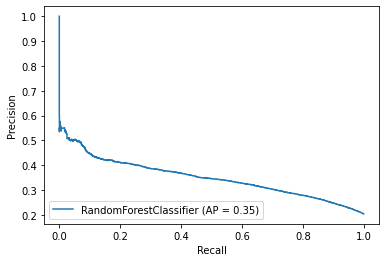

In [188]:
plot_precision_recall_curve(rf, X_test, y_test)

# 5.8.6 Gradient Boosting Classifier<a id='5.8.6_Gradient_Boosting_Classifier'></a>
[Table of Contents](#5.1_Contents)

This model had the greatest overall accuracy, but the lowest recall score among the advanced models, identifying 50% of defaulted loans.

In [150]:
gb_y_pred = gb.predict(X_test)

### Testing Classification Report

In [151]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.62      0.73    133050
           1       0.30      0.64      0.41     34135

    accuracy                           0.63    167185
   macro avg       0.59      0.63      0.57    167185
weighted avg       0.75      0.63      0.66    167185



### Testing Confusion Matrix

Normalized confusion matrix


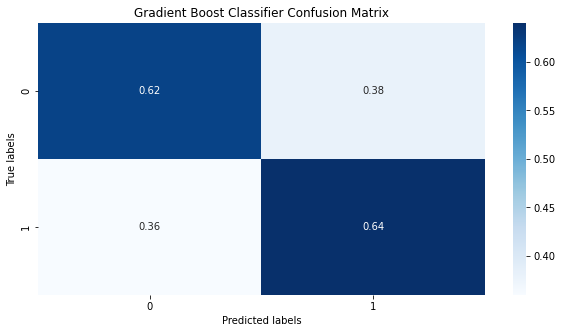

In [152]:
plot_confusion_matrix(y_test, gb_y_pred, 'Gradient Boost Classifier', normalize = True)

### Testing ROC curve

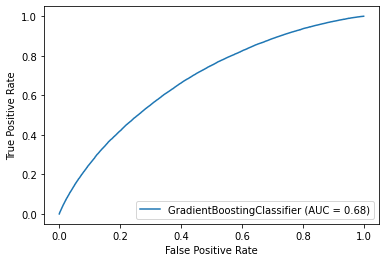

In [153]:
plot_roc_curve(gb, X_test, y_test)

### Testing Precision - Recall Curve

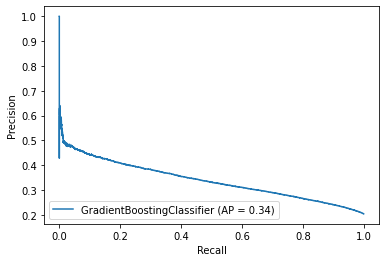

In [154]:
plot_precision_recall_curve(gb, X_test, y_test)

# 5.9 Model Selection<a id='5.9_Model_Selection'></a>
[Table of Contents](#5.1_Contents)

With this application, there are two primary considerations with selecting a model:

1) The model must be interpretable for compliance with regulation and audits.
2) The model should identify as many applicants that are likely to default as possible (recall score).

With these two considerations in mind, I believe that the entropy decision tree model is the best choice. It can be simply since the maximum depth is only three branches, and the top-contributing features are easily explained. It achieved the highest testing recall score among all the tested models as 83% (total percentage of correctly classified defaulted loans). Among all the advanced classifiers, the ROC and precision-recall curves showed similar performance. The entropy decision tree model was optimized with Randomized Search cross validation and has the following hyperparameter:

* Max Depth of 3 Branches
* 0.76:1 Class Weight (Non-Default:Default)
* Min Samples Split = 46
* Min Samples Leaf = 2

Naturally, there is room for improvement in the performance of the model. However, there is a limit to the predictive power of the selected features - more powerful features would need to be obtained from hard credit checks of applicants. The top positive features contributing to the entropy decision tree are:

1. Interest Rate
2. Time Since Last Credit Pull (Months)
3. Mortgage or No Mortgage
4. Loan Amount

# 5.10 Data Quantity Assessment<a id='5.10_Data_Quantity_Assessment'></a>
[Table of Contents](#5.1_Contents)

The plot below does seem to suggest that increasing the quantity of the training set would only marginally improve the training recall scores. It might be more efficient to allocate resources towards feature engineering instead.

In [155]:
fractions = [.05, .1, .25, .5, .6, .7, .8, .9, .95, .97, 1.0]
train_size, train_scores, test_scores = learning_curve(entropy_tree, X_train, y_train, train_sizes=fractions, scoring = 'recall',
                                                      random_state = 42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

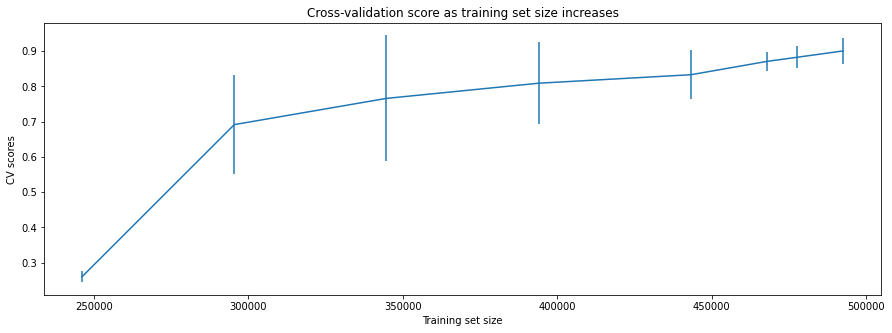

In [156]:
plt.subplots(figsize=(15, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

# 5.11 Retrain And Visualize<a id='5.11_Retrain'></a>
[Table of Contents](#5.1_Contents)

In [157]:
entropy_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'entropy', min_samples_split = 46,
                                                  min_samples_leaf = 2, max_depth = 3, class_weight = {0: 0.7612612612612613, 1: 1}
                                                  ).fit(X_final, y_final)

In [158]:
sorted(list(zip(entropy_tree.feature_importances_, X_train.columns)), reverse = True)

[(0.6329591441896658, 'int_rate'),
 (0.3670408558103342, 'last_credit_pull_d'),
 (0.0, 'total_bal_ex_mort'),
 (0.0, 'tot_hi_cred_lim'),
 (0.0, 'tot_bal_tot_hi_cred_lim_ratio'),
 (0.0, 'tot_bal_income_ratio'),
 (0.0, 'tax_liens'),
 (0.0, 'purpose_vacation'),
 (0.0, 'purpose_other'),
 (0.0, 'purpose_moving'),
 (0.0, 'purpose_medical'),
 (0.0, 'purpose_major_purchase'),
 (0.0, 'purpose_house'),
 (0.0, 'purpose_energy'),
 (0.0, 'purpose_credit_card'),
 (0.0, 'purpose_consolidation'),
 (0.0, 'purpose_car'),
 (0.0, 'pub_rec_bankruptcies'),
 (0.0, 'mths_since_recent_inq'),
 (0.0, 'mths_since_last_delinq'),
 (0.0, 'loan_amnt'),
 (0.0, 'installment'),
 (0.0, 'inq_last_12m'),
 (0.0, 'home_ownership_RENT'),
 (0.0, 'home_ownership_OWN'),
 (0.0, 'home_ownership_NONE'),
 (0.0, 'home_ownership_MORTGAGE'),
 (0.0, 'fico_avg'),
 (0.0, 'emp_length_No Employment'),
 (0.0, 'emp_length_< 1 year'),
 (0.0, 'emp_length_9 years'),
 (0.0, 'emp_length_8 years'),
 (0.0, 'emp_length_7 years'),
 (0.0, 'emp_length_6 

In [159]:
# Visualize the decision tree
dot_data = sklearn.tree.export_graphviz(entropy_tree, out_file=None, 
                     feature_names=X_test.columns,  
                     class_names=[str(entropy_tree.classes_[0]), str(entropy_tree.classes_[1])],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('entropy_tree_fully_trained')

'entropy_tree_fully_trained.pdf'

# 5.12 Export<a id='5.12_Export'></a>
[Table of Contents](#5.1_Contents)

In [160]:
best_model = entropy_tree
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [161]:
# save the model

# modelpath = 
# save_file(best_model, 'loan_default_logreg_model.pkl', modelpath)